# Pauta Control Aprendizaje No Supervisado

*Al finalizar, subir el notebook desarrollado a siveducMD*

Considere los datos adjuntos provenientes de una muestra anonimizada de estudiantes de esta universidad que han recibido apoyo mediante consejerías.

Se trata de caracterizar estos de estudiantes en función de las siguientes variables que reflejan su rendimiento en el semestre en que tuvo acceso a una consejería:

* PGA: promedio general acumulado

* PSP: promedio semestral 

* N_cursos: Número de cursos inscritos ese semestre

* N_aprobados: Número de cursos aprobados en dicho semestre

* Ranking: asociado con su cohorte (menor valor corresponde a mejor desempeño)

En este control se trata de determinar si las variables aquí descritas permiten agrupar a los estudiantes de modo de caracterizar distintos perfiles de estudiantes que reciben consejeria.


In [1]:
library(ggplot2)
datos <-read.csv("..//data/datosV.csv",dec=".",sep=";",header=TRUE)
print(datos[1:10,])

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


    PGA  PSP N_cursos N_aprobados Ranking
1  4.38 4.99        6           4      40
2  5.25 5.48        7           6      45
3  6.14 6.28        7           7      22
4  5.56 5.22       10           5      29
5  4.71 4.95        5           3      43
6  4.33 4.60        6           4      57
7  4.05 4.93        5           2      66
8  5.11 4.63        5           4      33
9  6.11 6.24        7           7       7
10 5.17 5.06        5           4      44


**Pregunta 1. (2 puntos)** 

**(i)** Realice un análisis exploratorio de los datos de las 5 características de los estudiantes, incluyendo resúmenes de cada variable, boxplots, correlaciones y  análisis de componentes principales (PCA). Interprete sus resultados.

**(ii)**  Indique cual es el interés de utilizar PCA en este conjunto de datos. ¿Es necesario realizar alguna transformación en los datos antes de continuar con su análisis?

Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'cluster' was built under R version 3.6.3"Warning message:
"package 'mclust' was built under R version 3.6.3"Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.
corrplot 0.92 loaded


      PGA            PSP           N_cursos      N_aprobados    
 Min.   :1.09   Min.   :1.580   Min.   : 1.00   Min.   : 0.000  
 1st Qu.:4.59   1st Qu.:4.810   1st Qu.: 5.00   1st Qu.: 3.000  
 Median :5.48   Median :5.490   Median : 6.00   Median : 5.000  
 Mean   :5.17   Mean   :5.335   Mean   : 6.63   Mean   : 4.638  
 3rd Qu.:6.14   3rd Qu.:5.995   3rd Qu.: 8.00   3rd Qu.: 7.000  
 Max.   :6.88   Max.   :6.820   Max.   :14.00   Max.   :10.000  
    Ranking      
 Min.   :  1.00  
 1st Qu.:  9.00  
 Median : 21.00  
 Mean   : 26.91  
 3rd Qu.: 37.00  
 Max.   :139.00  

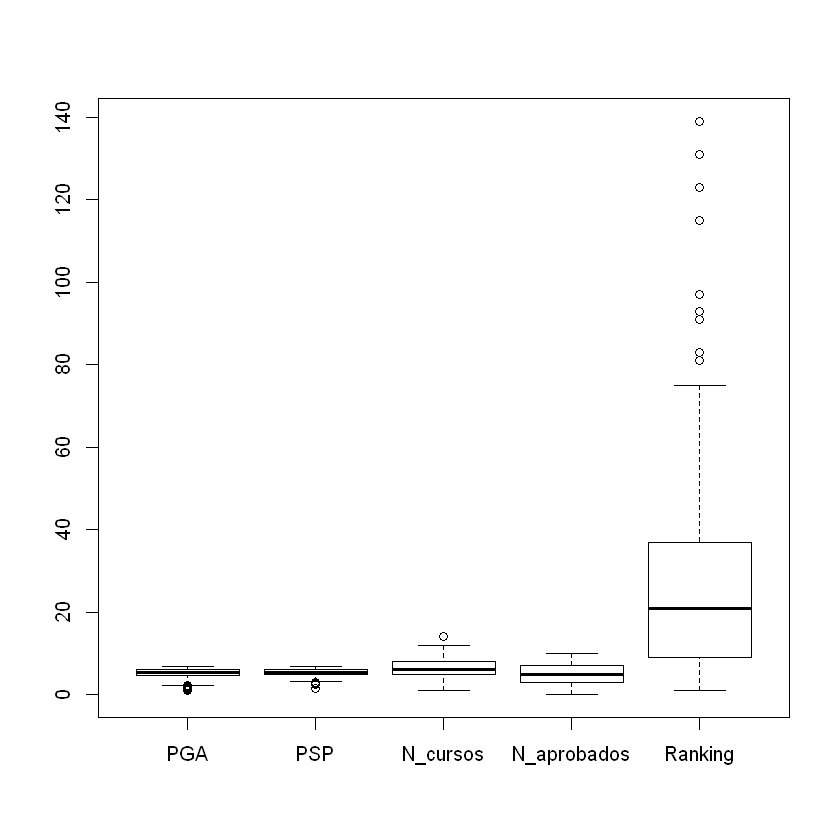

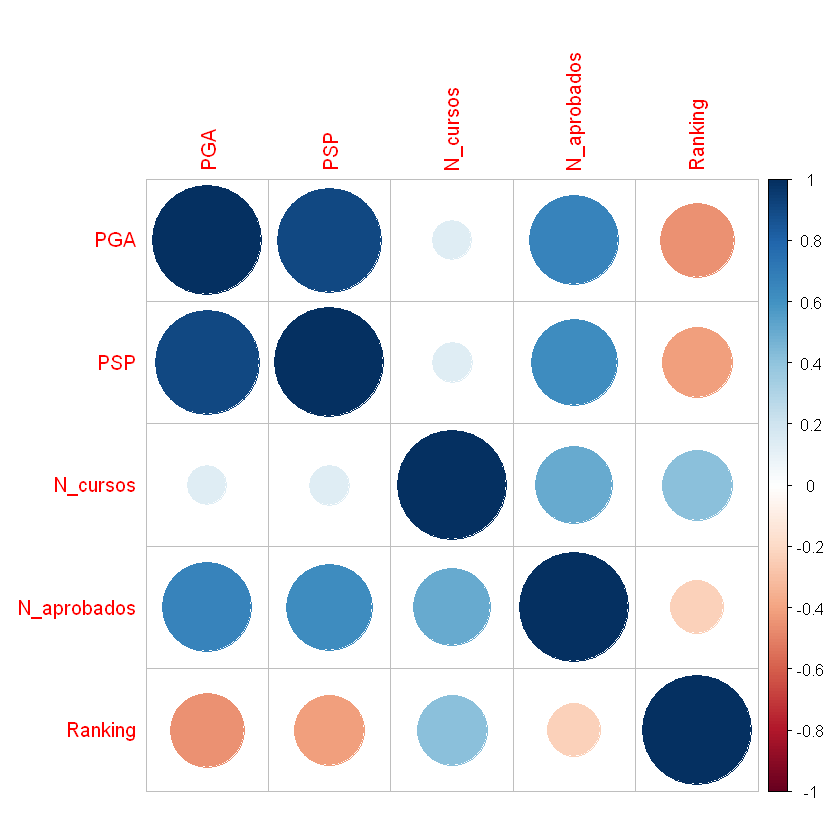

In [2]:
#install.packages("corrplot")}

library(factoextra)
library(cluster)
library(mclust)
library(corrplot)
library(reshape2)
summary(datos)
boxplot(datos)
corrplot(cor(datos))

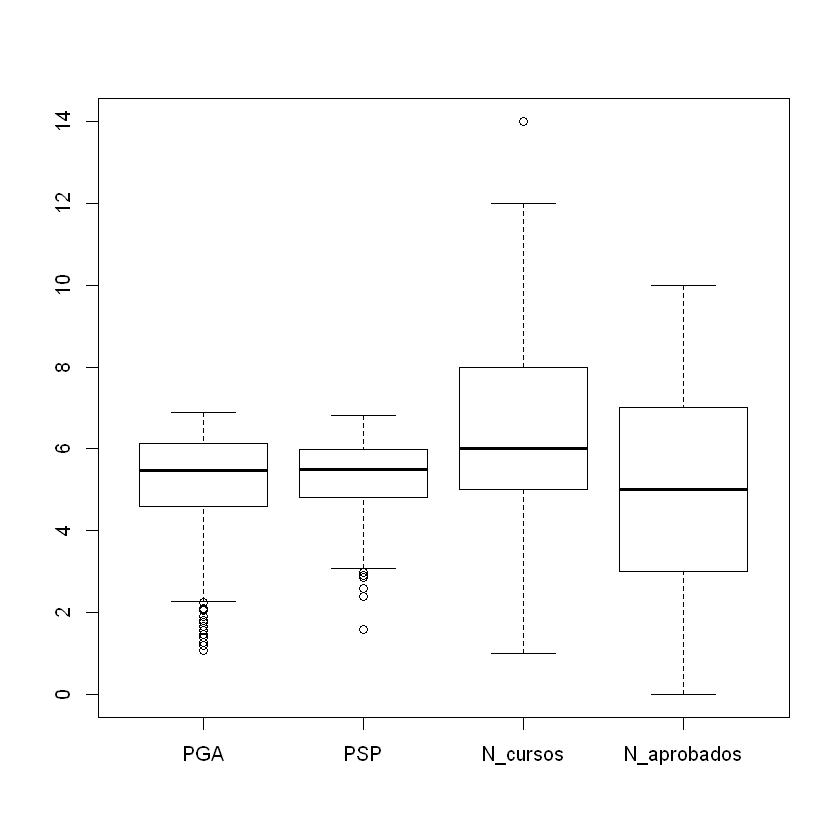

In [3]:
boxplot(datos[,1:4])

Importance of components:
                           Comp.1     Comp.2      Comp.3      Comp.4
Standard deviation     25.1098912 3.29508446 1.500760773 0.932368110
Proportion of Variance  0.9781588 0.01684429 0.003494159 0.001348635
Cumulative Proportion   0.9781588 0.99500305 0.998497211 0.999845846
                             Comp.5
Standard deviation     0.3152225238
Proportion of Variance 0.0001541538
Cumulative Proportion  1.0000000000

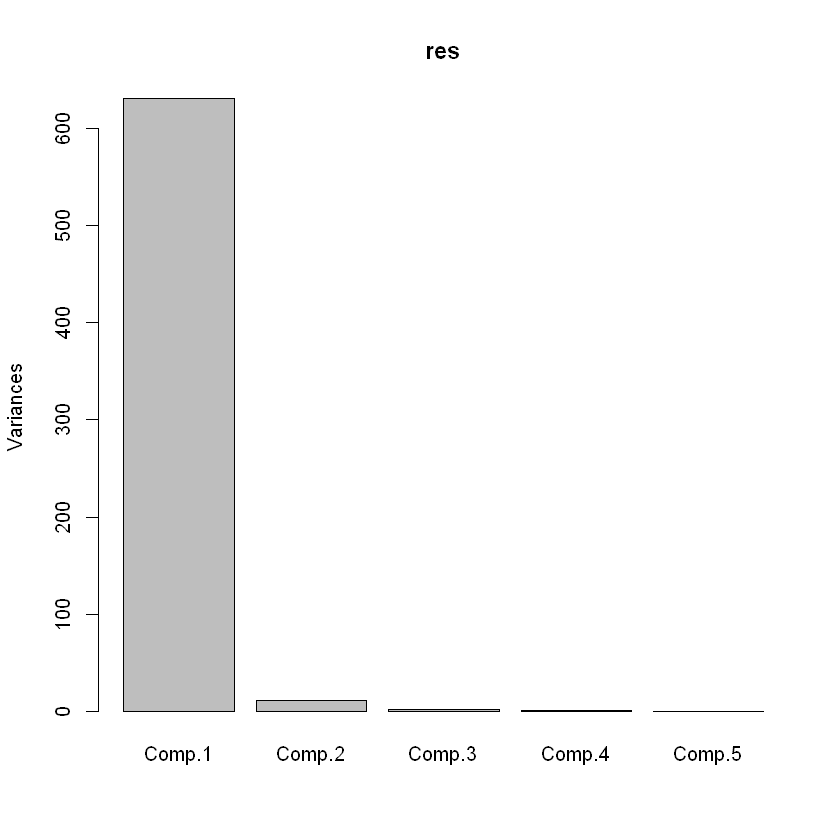

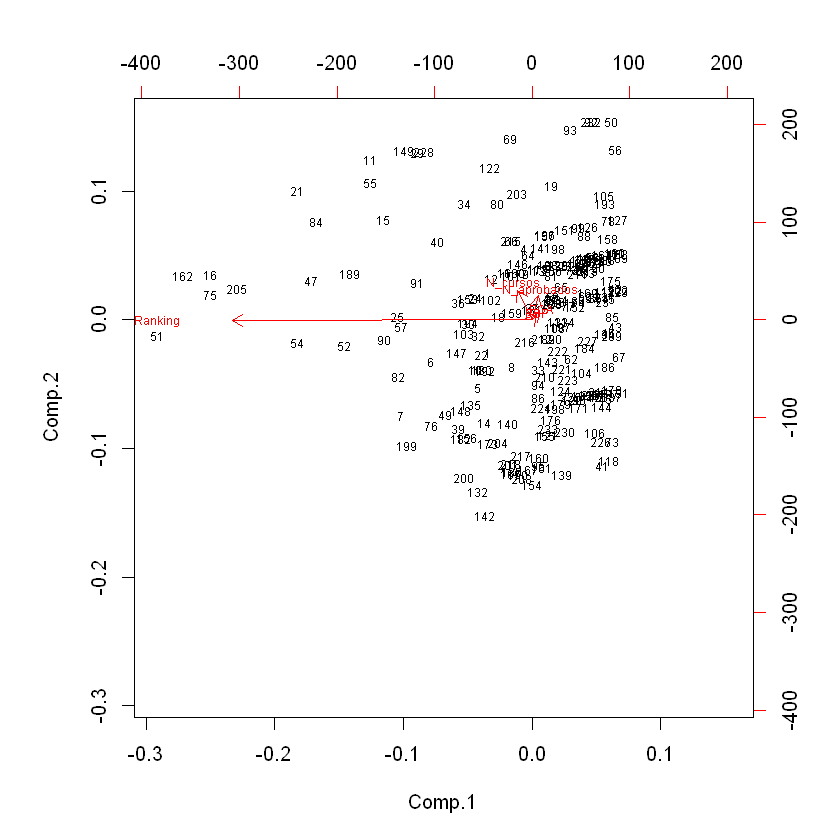

In [4]:
res <- princomp(datos)
plot(res)
summary(res)
biplot(res,cex=0.6)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.6551757 1.2249282 0.66564830 0.45439991 0.29849775
Proportion of Variance 0.5502629 0.3013722 0.08899624 0.04147233 0.01789634
Cumulative Proportion  0.5502629 0.8516351 0.94063133 0.98210366 1.00000000

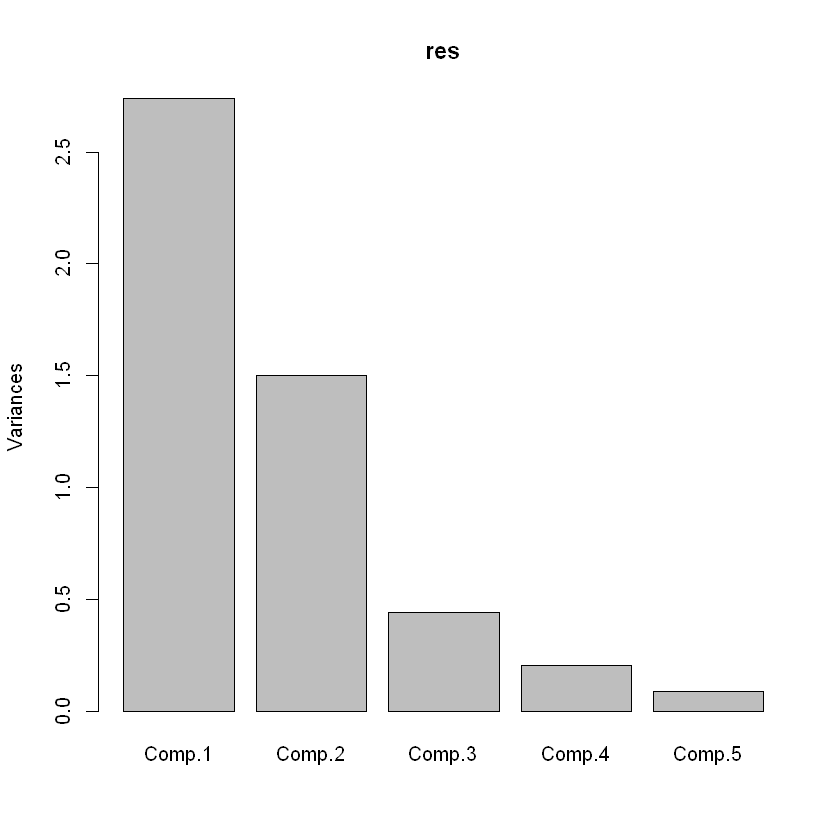

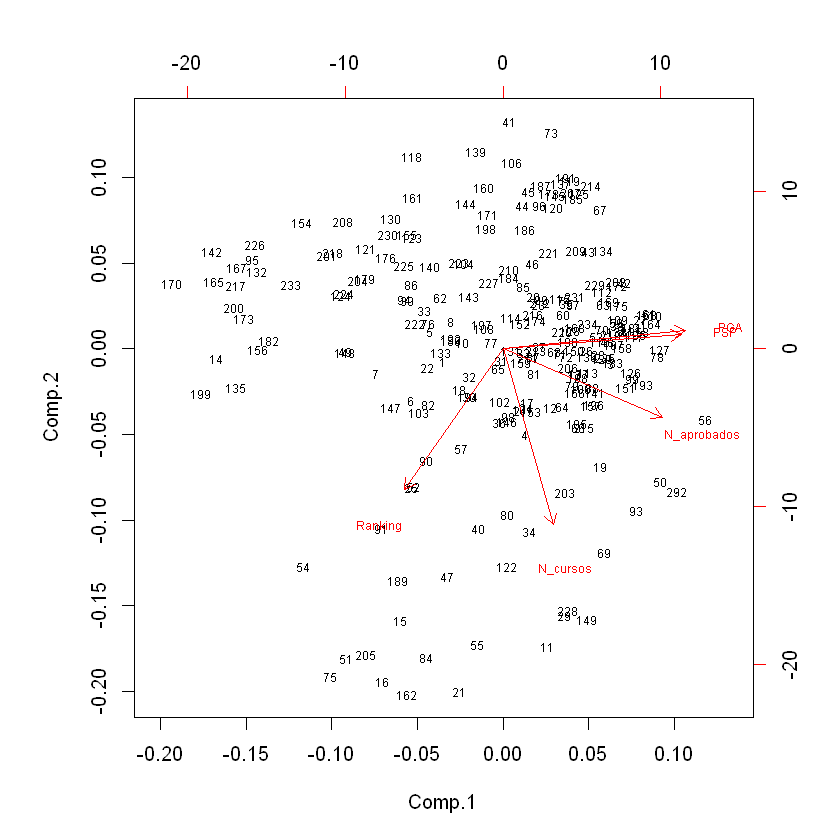

In [5]:
datos <- scale(datos) 
res <- princomp(datos)
plot(res)
summary(res)
biplot(res,cex=0.6)

#### Respuesta Pregunta 1
**(i)** Los resúmenes de variables y boxplot nos muestran que:
* los promedios de notas (PGA Y PSP) están en el rango de 1 a 7 con una fuerte concentración entre 5 y 6 en el caso del PGA y con valores un poco mas concentrados en el caso del PSP. En ambos casos la mediana se aproxima a 5.5.
* los cursos inscritos (N_cursos) tiene un rango de 1 a 14 cursos, concentrados entre 5 y 8 cursos y una mediana de 6.
* los cursos aprobados (N_aprobados) tiene un rango de 0 a 10 cursos, con valores mas dispersos que en el caso de los cursos inscritos, el 50% de ellos entre 3 a 7 cursos con una mediana de 5.
* el ranking es la variable con mayor dispersión con un rango de 1 a 139, concentrado entre 9 y 37, mediana en 21 y varios valores extremos altos.

El gráfico de correlaciones nos muestra que hay correlación fuerte entre PSP y PGA y también importante correlación entre esas variables y N_aprobados. Bastante mas débil con N_cursos. 
PSP, PGA y N_aprobados tienen correlación negativa con Ranking, en cambio N_cursos debilmente  positiva con Ranking. *Podemos interpretar que los estudiantes de menores valores de Ranking tienden a inscribir mas asignaturas en un intento de no retrasarse mucho en su avance curricular.*

**(ii)** Al realizar el análisis en componentes principales, se hace evidente que es necesario escalar los datos, porque la variable Ranking tiene valores en mucho mayores (1 orden de magnitud) que las otras variables. 

PCA con datos escalados nos muestra que el primer plano principal conserva sobre el 85% de la variabilidad de los datos, por lo que resulta muy representativo de los datos originales.
La representación de las variables es coincidente con el análisis de correlaciones, mostrando que Ranking se asocia negativamente con PSPy PGA, mientras que N_cursos aparece debilmente asociada positivamente con todas las variables. Es decir, representa una dirección independiente (ortogonal) de caracterización de los datos. N_aprobados también juega un rol relativamente independiente de las demás características.

En relación de los datos, se observa en el primer plano principal una concentración de ellos asociada a mayores valores de PSP y PGA, y luego datos mas aislados con mayores valores de ranking y menores valores de todas las otras variables (cuadrante superior izquierdo del gráfico) y un tercer grupo menos denso de datos con alto ranking y mayores valores de N_inscritos. Lo anterior puede ser corroborado con un análisis de agrupamiento.


**Pregunta 2. (4 puntos)** 

**(i)** Escoja dos métodos de agrupamiento que estime son adecuado para tratar estos datos. En particular, explique las principales características de los métodos considerados y justifique su elección. 

**(ii)** Desarrolle los agrupamientos correspondientes explicando como escogió los valores de los parámetros utilizados. Itere si es necesario.

**(iii)** Grafique sus resultados utilizando proyecciones de los agrupamientos en el primer plano de componentes principales. Interprete sus resultados. 

**(iv)** Utilice alguna de las medidas de calidad de clustering que conoce para contrastar los dos métodos utilizados. Interprete sus resultados y concluya.


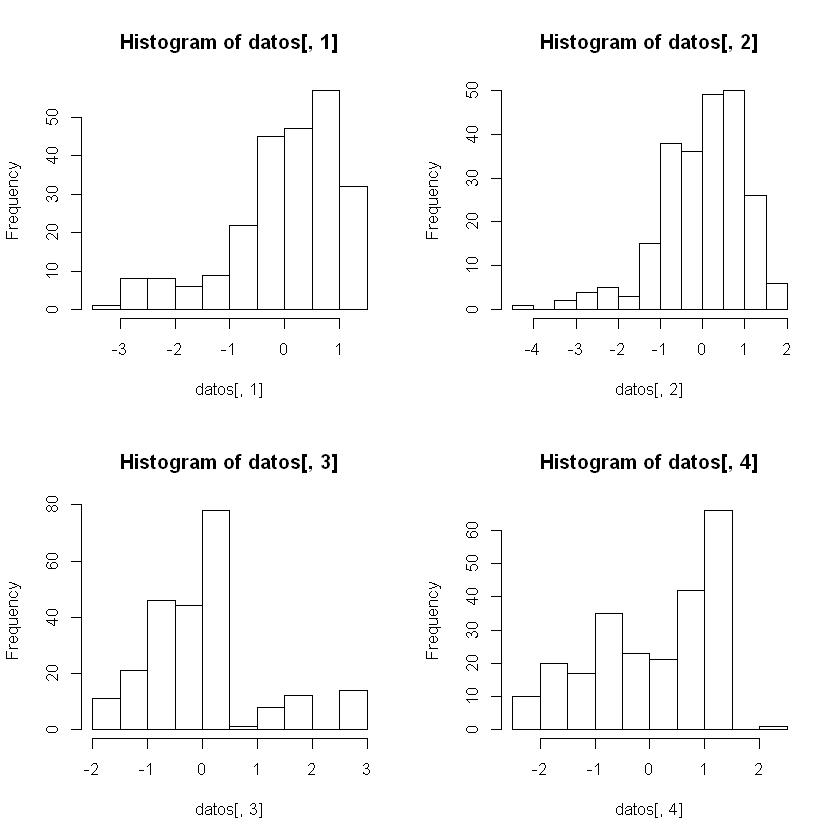

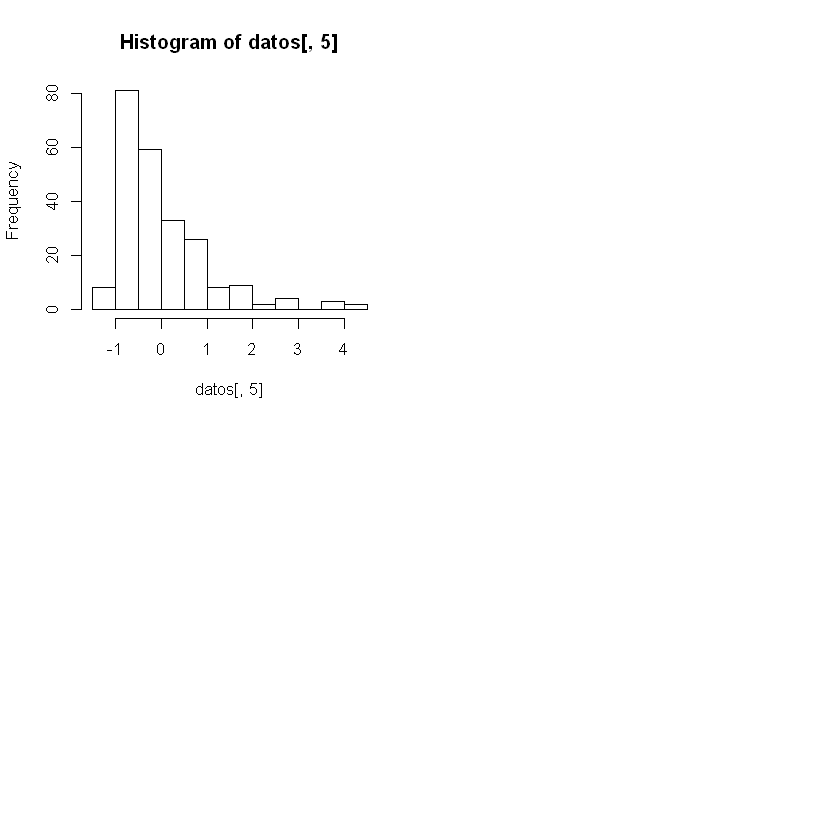

In [6]:
par(mfrow=c(2,2))
hist(datos[,1])
hist(datos[,2])
hist(datos[,3])
hist(datos[,4])
hist(datos[,5])

#### Respuesta Pregunta 2

**(i)** 
De acuerdo al análisis exploratorio parece razonable utilizar GMM como algoritmo de agrupamiento. En efecto, revisando la hipótesis de normalidad, la inspección visual de los boxplot e histogramas evidencia que la mayor parte de las variables tienen un comportamiento normal o posiblemente mezcla de normales, *a excepción de la variable Ranking*.

GMM supone que los datos provienen de un proceso generador de datos del tipo Mezcla de Gaussianas, en que cada grupo corresponde a una distribución Gaussiana distinta. Se asume que existe una variable latente que indica el grupo a que pertenece cada observación. Se utiliza el algoritmo EM para obtener un agrupamiento óptimo. Este modelo permite grupos no esféricos y es robusto.

Como tenemos una variable que parece no provenir de una mezcla de normales, vamos a contrastar GMM con kmeans, que no requiere hipótesis sobre la distribución de las variables, por lo que es aplicable sin mayores condiciones. 

Kmeans es un algoritmo de agrupamiento, que una vez definida una distancia entre datos (en nuestro caso distancia Euclidiana), itera con el algoritmo EM entre fases de definición de prototipos y asignación de los datos a grupos, minimizando la suma de las distancias de los datos a los prototipos del grupo al que han sido asignados. 

Una de las desventajas de Kmeans es que no maneja bien  datos que contengan error en sus medidas, que no es el caso de estos datos. Por lo que se ve bien aspectada su aplicación.

 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEE (ellipsoidal, equal shape and orientation) model with 7 components: 

 log-likelihood   n df       BIC       ICL
      -873.7256 235 62 -2085.946 -2120.115

Clustering table:
 1  2  3  4  5  6  7 
50 58 24 56 14 16 17 

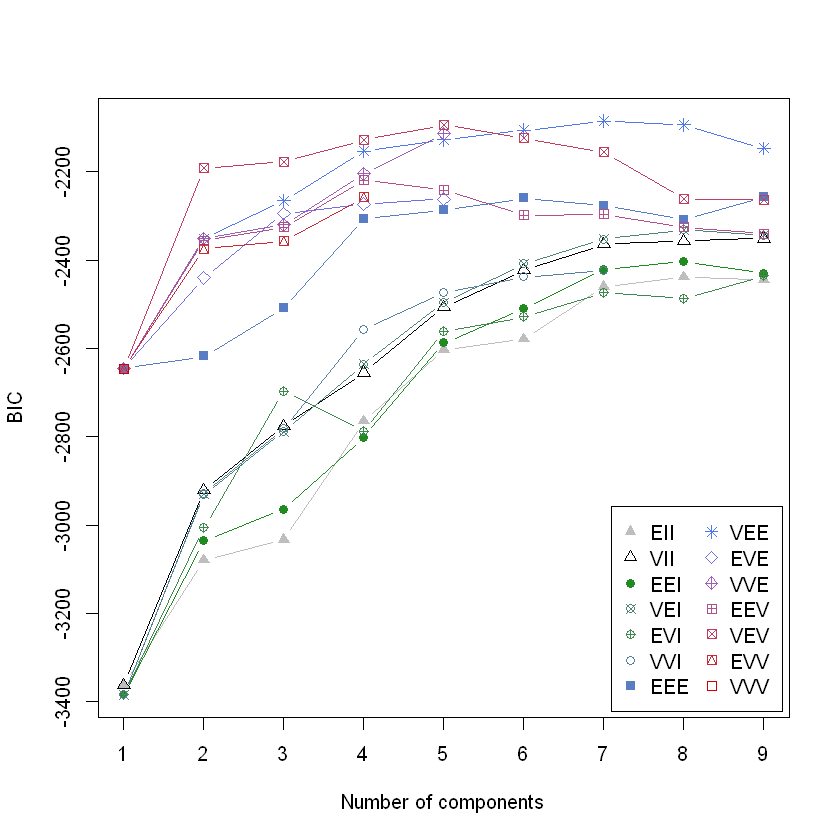

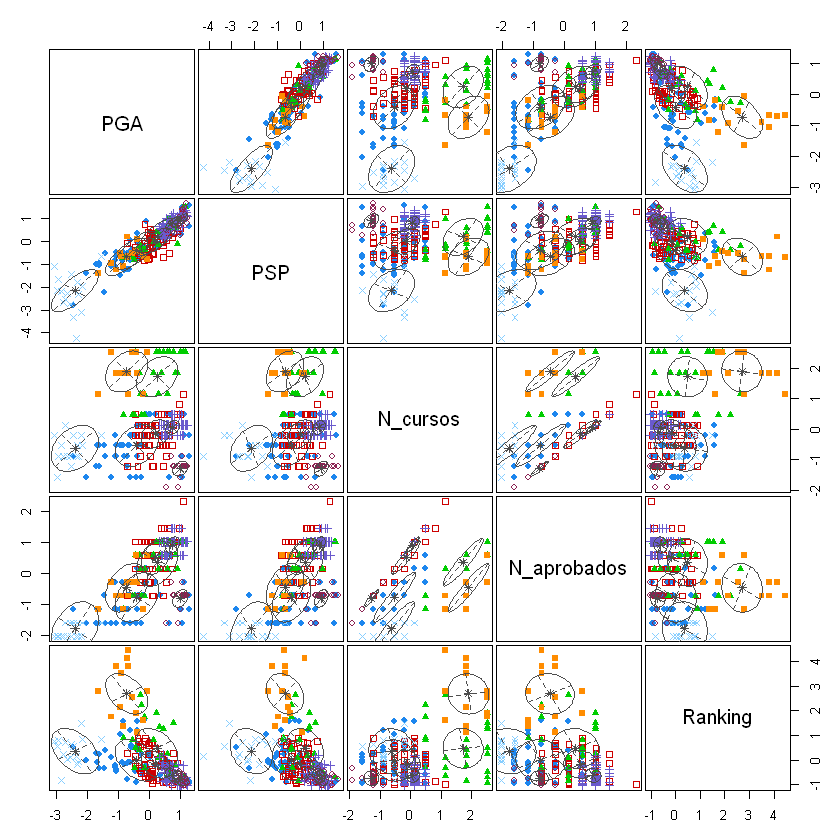

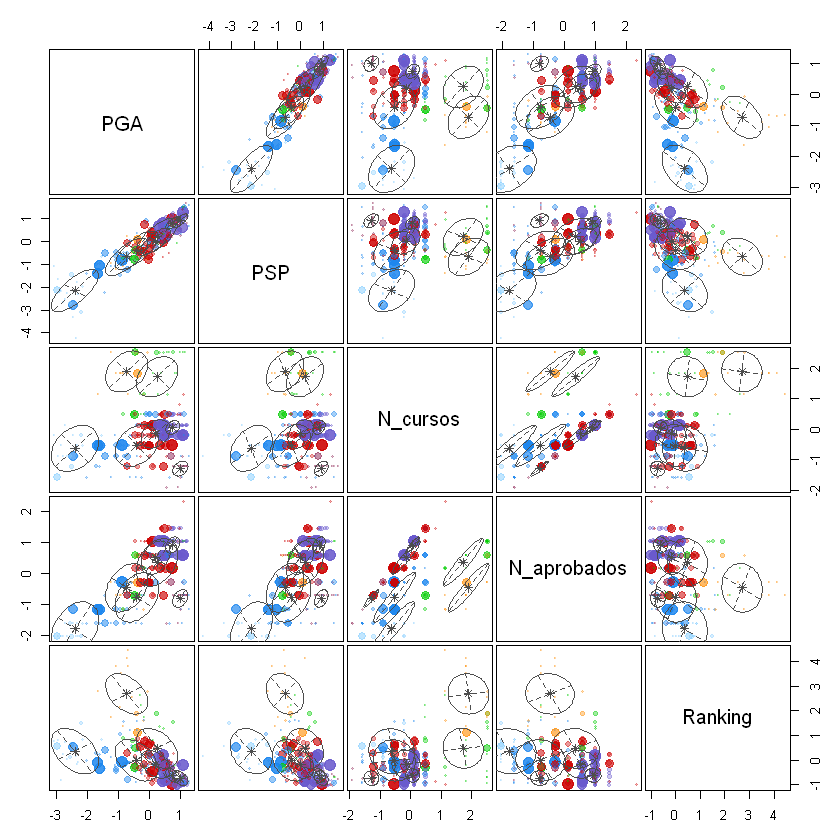

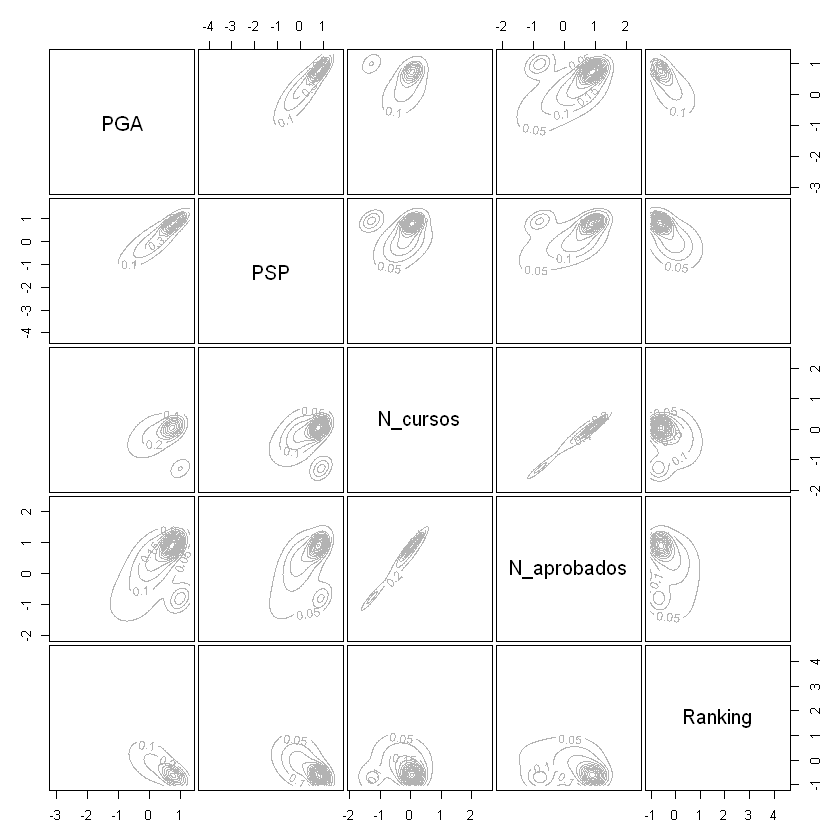

In [7]:
#install.packages("mclust")
library(mclust)
clus <-Mclust(datos)
summary(clus)
plot(clus)

In [21]:
k0=5

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 5 components: 

 log-likelihood   n df       BIC       ICL
      -806.6892 235 88 -2093.822 -2114.682

Clustering table:
 1  2  3  4  5 
66 72 48 32 17 

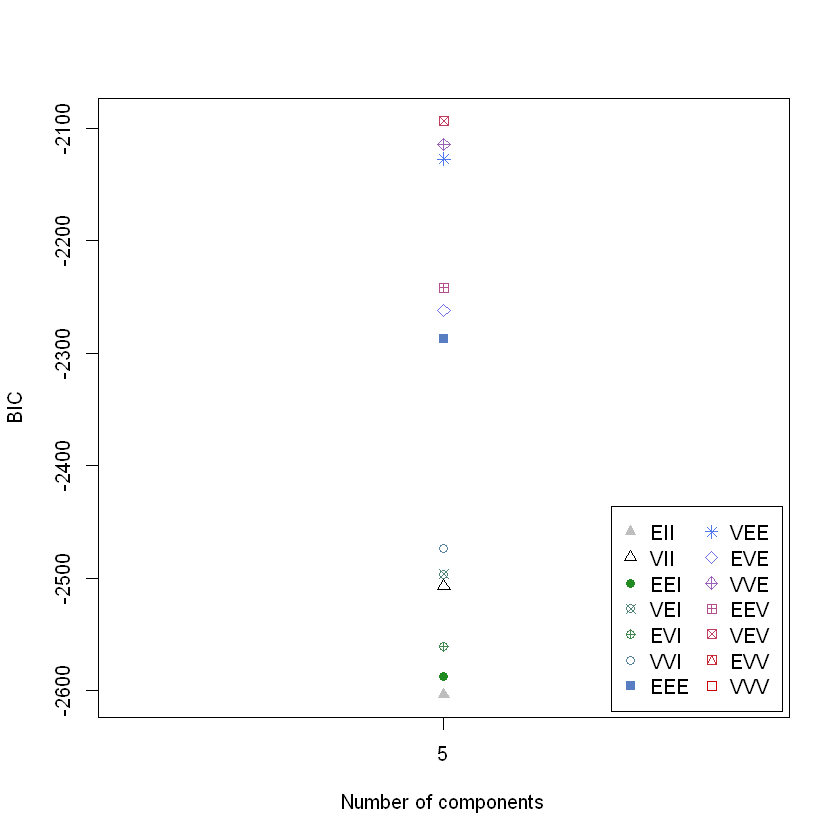

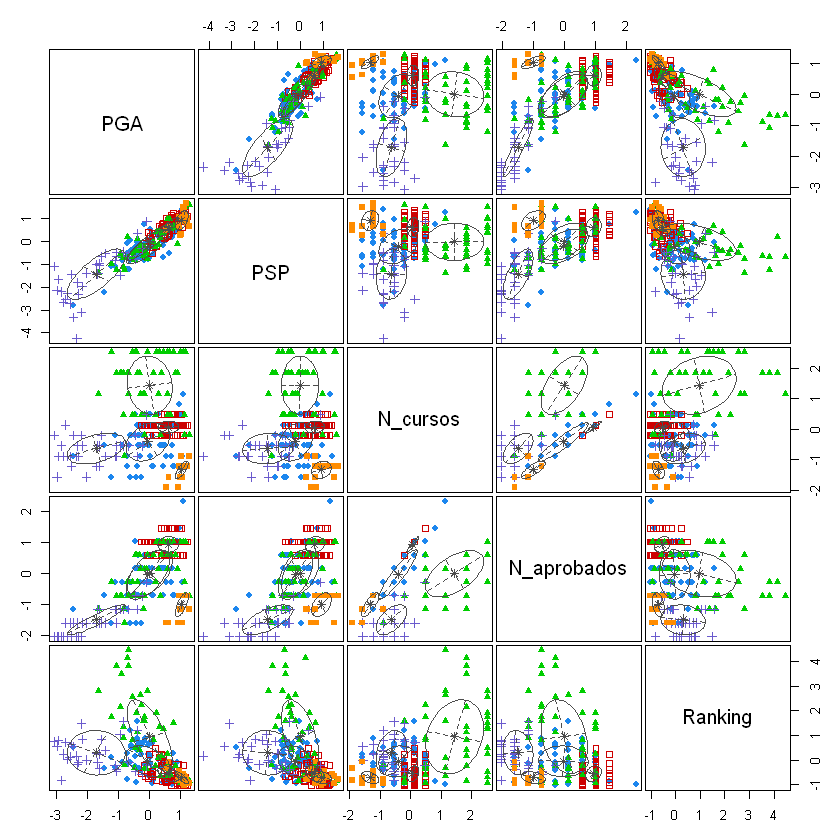

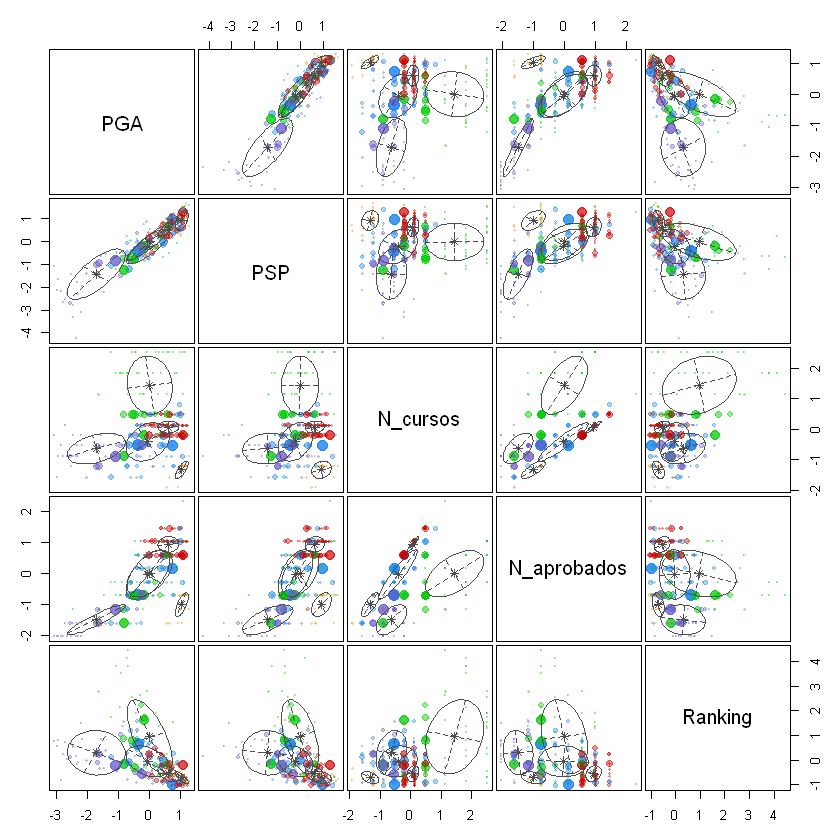

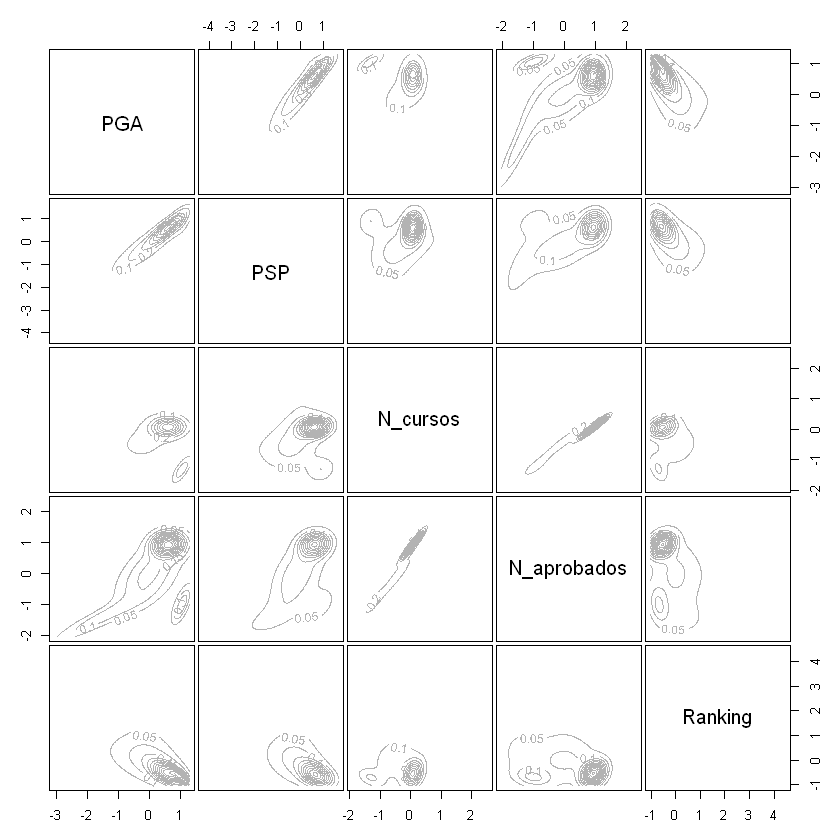

In [22]:
clus <-Mclust(datos,G=k0)
summary(clus)
plot(clus)

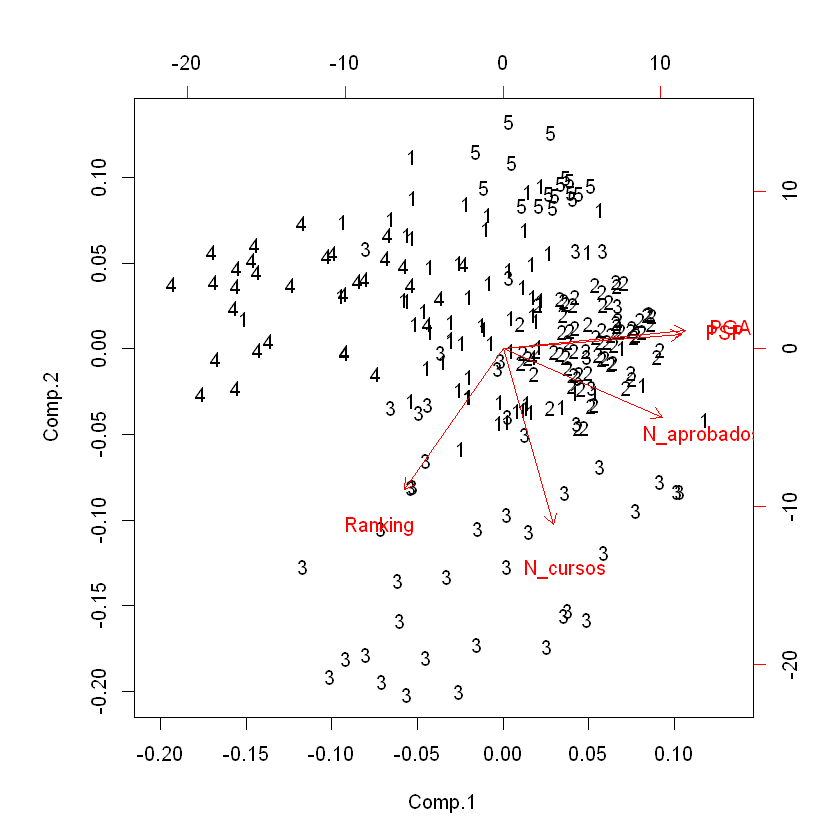

In [23]:
cl1<-clus$classification
biplot(res,xlabs=cl1)

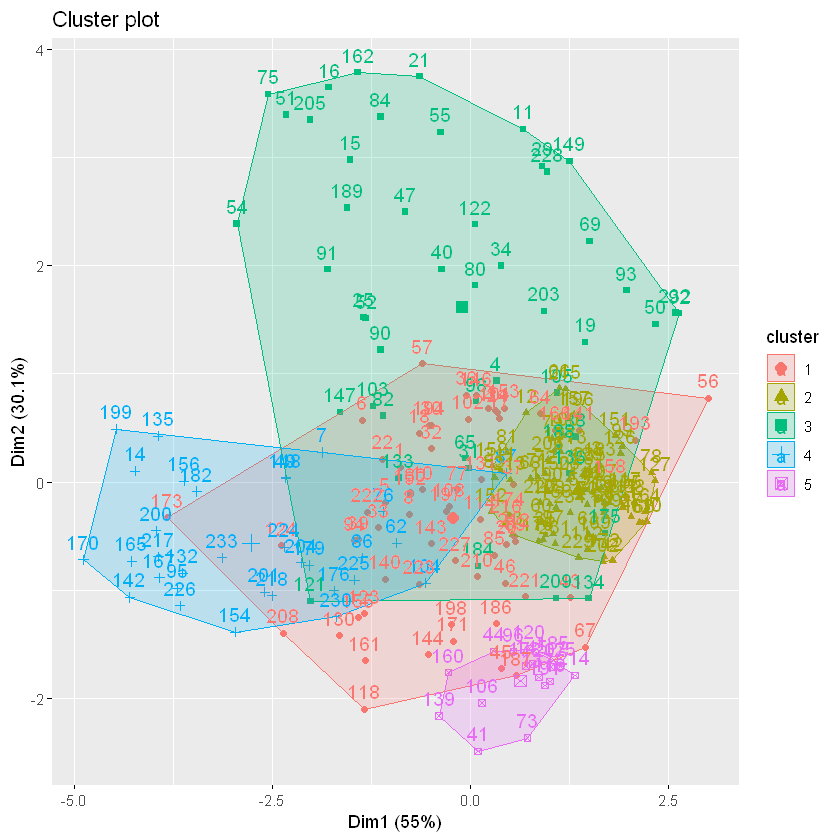

In [24]:
library(cluster)
fviz_cluster(clus, df)

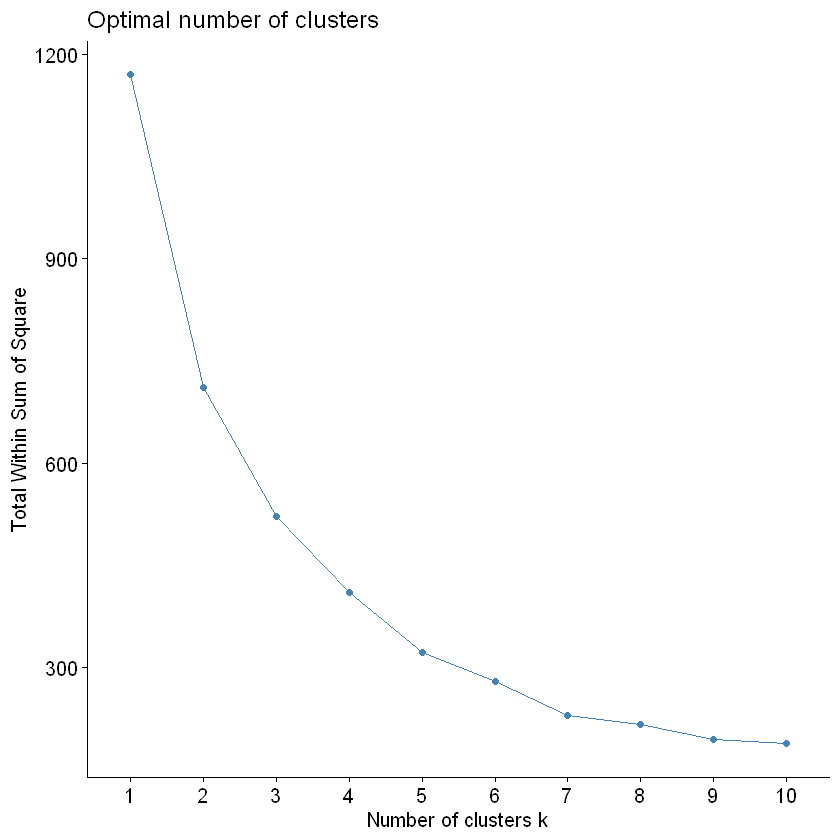

In [25]:

df <- data.frame(datos)
fviz_nbclust(df, kmeans, method = "wss")

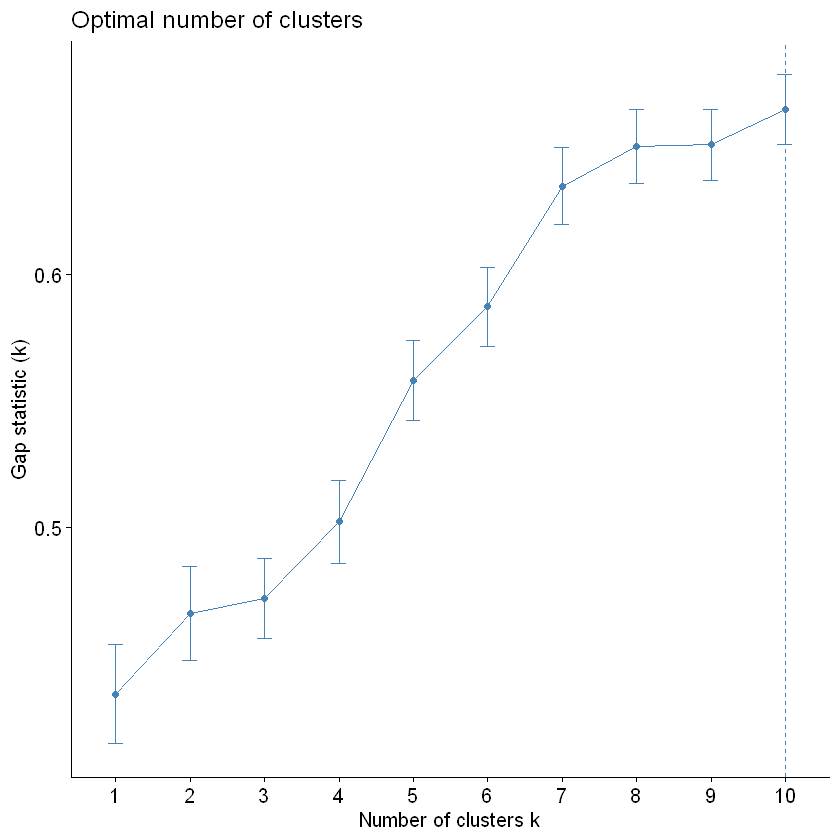

In [26]:
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

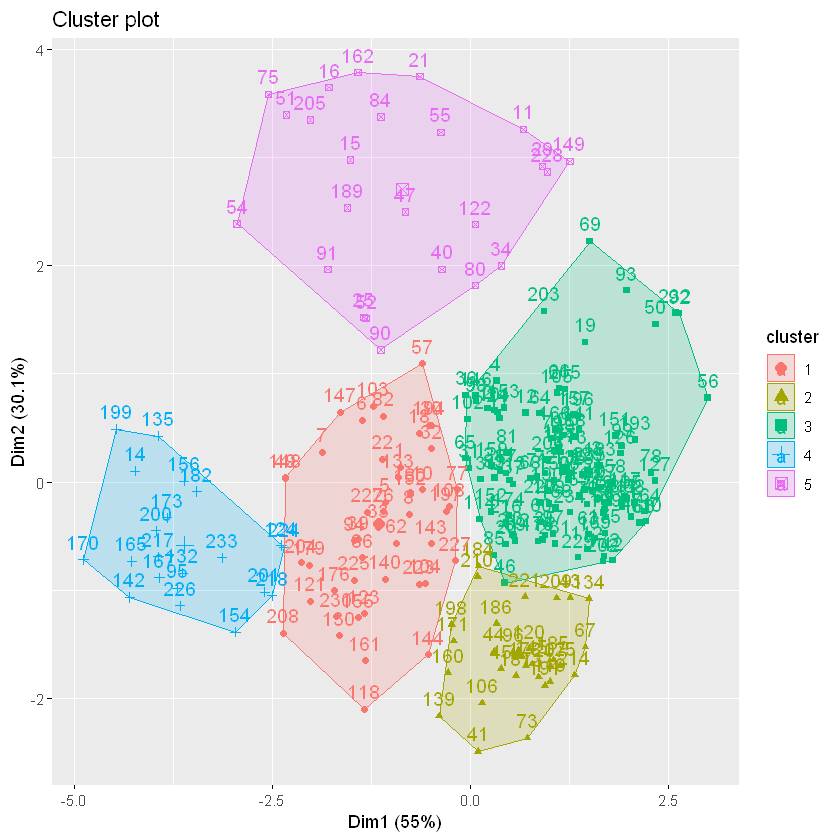

In [27]:
res_kmeans<-kmeans(datos,k0,iter.max=1000,nstart=10)

fviz_cluster(res_kmeans, df)
cl2 <- res_kmeans$cl

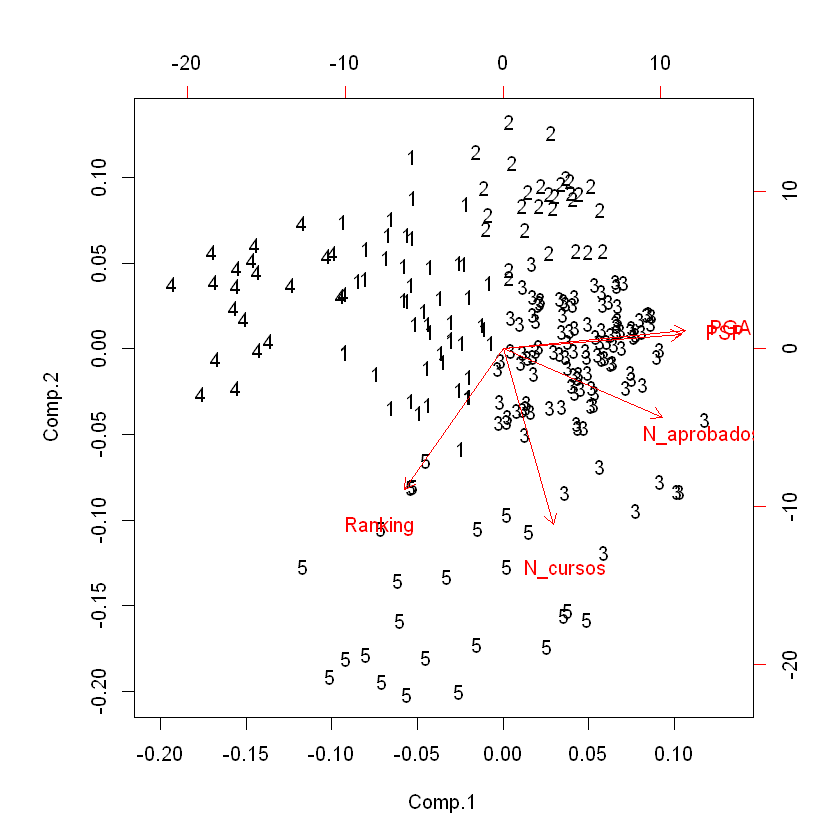

In [28]:
biplot(res,xlabs=cl2)

#### Respuestas Pregunta 2
**(ii)** Para definir el número de grupos se consideró por una parte el valor de BIC en el caso de GMM y las estrategias empiricas basada en la suma del cuadrado de las distancias intragrupos y el gap estadístico en el caso de Kmeans. 
Para  GMM, el máximo obtenido por el método automatizado es G=7 con estructura de varianza-covarianza VEE. Sin embargo, bajo el criterio de parsimonia es elegible el primer  óptimo local que entega BIC, que  es G=5 para la estructura de varianza covarianza VEV.  En el caso Kmeans el método del codo y gap estadístico también confirman G=5 como el número de grupos mas adecuado.


In [31]:
apply(datos[cl2==1,],2,summary)
apply(datos[cl2==2,],2,summary)
apply(datos[cl2==3,],2,summary)
apply(datos[cl2==4,],2,summary)
apply(datos[cl2==5,],2,summary)

,PGA,PSP,N_cursos,N_aprobados,Ranking
Min.,-1.6078447,-1.4653818,-1.5770246,-1.5828950,-0.9121411
1st Qu.,-0.8096526,-0.7977013,-0.8957732,-1.1478303,-0.3248995
Median,-0.4772290,-0.6222937,-0.5551474,-0.7127656,0.1827162
Mean,-0.5692559,-0.6192287,-0.5551474,-0.6583825,0.2134054
3rd Qu.,-0.2837848,-0.4440569,-0.2145217,-0.2777009,0.7002852
Max.,0.1124941,0.3452773,0.4667297,0.5924285,1.5960776


,PGA,PSP,N_cursos,N_aprobados,Ranking
Min.,0.03737018,-0.0508044,-1.9176503,-1.5828950,-1.03158011
1st Qu.,0.69846110,0.4810767,-1.2363989,-0.7127656,-0.95195412
Median,0.99895697,0.7866254,-1.2363989,-0.7127656,-0.79270214
Mean,0.88134910,0.8155023,-1.1189417,-0.7877767,-0.71170329
3rd Qu.,1.12666771,1.0808575,-0.8957732,-0.7127656,-0.55382417
Max.,1.28442805,1.6806383,-0.2145217,0.1573638,-0.07606823


,PGA,PSP,N_cursos,N_aprobados,Ranking
Min.,-0.4434232,-0.6845351,-0.5551474,-0.2777009,-1.0315801
1st Qu.,0.3078165,0.1755280,-0.2145217,0.5924285,-0.7927021
Median,0.5707504,0.5829263,0.1261040,1.0274932,-0.5538242
Mean,0.5442908,0.5350560,0.2738089,0.8157361,-0.4262817
3rd Qu.,0.8261718,0.9450581,0.4667297,1.0274932,-0.1556942
Max.,1.2093041,1.5335223,2.5104840,2.3326873,0.8794436


,PGA,PSP,N_cursos,N_aprobados,Ranking
Min.,-3.065250,-4.2492701,-1.5770246,-2.0179596,-0.832515139
1st Qu.,-2.712167,-2.6649434,-0.8957732,-2.0179596,0.003557757
Median,-2.456746,-2.2009620,-0.8957732,-1.5828950,0.242435727
Mean,-2.368743,-2.1567733,-0.7822312,-1.7071992,0.304999005
3rd Qu.,-2.171274,-1.4427486,-0.5551474,-1.5828950,0.640565678
Max.,-1.457597,-0.9674505,0.1261040,-0.7127656,1.476638574


,PGA,PSP,N_cursos,N_aprobados,Ranking
Min.,-1.6378943,-1.37484884,0.4667297,-1.14783026,0.4016877
1st Qu.,-0.7495534,-0.67038930,1.6589197,-0.71276556,1.3571996
Median,-0.4133736,-0.41293621,1.8292326,-0.27770087,1.9145815
Mean,-0.4165038,-0.37898635,1.8576180,-0.07829622,2.1733660
3rd Qu.,-0.1523178,0.01709532,2.5104840,0.59242852,2.7904674
Max.,0.7735851,0.67345923,2.5104840,1.02749322,4.4626132


**(iii)*** Las proyecciones en el primer plano principal muestran que Kmeans logra grupos mas separados que GMM, por lo que realizaremos la interpretación de los grupos definidos por Kmeans:

**Grupo 1**: Corresponde a los estudiantes que tienen valores medios de Ranking y pequeños de las demás variables.

**Grupo 2**: Corresponde a los estudiantes con menores valores de Ranking, pequeños dde N_aprobados y N_cursos y altos de PGA y PSP, es decir los estudiantes de **mejor desempeño** pero que no cursan muchos cursos en el semestre observado.

**Grupo 3**: Corresponde a los estudiantes con valores bajos de Ranking, altos de N_aprobados y de medios a altos de N_cursos, PGA y PSP, es decir estudiantes de **buen desempeño** basado en alto número de asignaturas aprobadas y valores medios las demás variables.

**Grupo 4**: Corresponde a los estudiantes con valores altos de Ranking, los menores valores de N_aprobados, N_cursos, PGA y PSP, es decir los estudiantes de **bajo desempeño** que se conjuga con los mas bajos valores de número de cursos inscritos y de  las otras variables.

**Grupo 5**: Corresponde a los estudiantes con valores altos de Ranking y N_cursos junto a valores pequeños de N_aprobados, PGA y PSP, es decir los estudiantes de **mas bajo desempeño** que se conjuga con alto número de cursos inscritos pero bajos resultados en las otras variables.

In [29]:
#implementación de Purity
ClusterPurity <- function(clusters, classes) {
  sum(apply(table(classes, clusters), 2, max)) / length(clusters)
}

In [30]:
## Calculo de medida de calidad del agrupamiento

print(table(cl1,cl2))
print(ClusterPurity(cl1,cl2))

   cl2
cl1  1  2  3  4  5
  1 31  9 24  2  0
  2  0  0 72  0  0
  3  5  3 16  0 24
  4 12  0  1 19  0
  5  0 17  0  0  0
[1] 0.693617


**(iv)*** La medida de Purity nos permite concluir que ambos métodos de agrupamiento tiene casi un 70% de coincidencia, lo que indica que ambos métodos permiten detectar en gran medida la misma estructura de agrupamiento de los datos. Las mayores confusiones se detectan en los grupos que consideran estudiantes con desempeños medios o altos (1 a 3) medidos por el ranking. En cambio, los grupos 4 y 5 de menores desempeños son coincidentes en ambos métodos.